## Tweets showing asian sentiment with fear and anger

In [1]:
from pyspark.sql import SparkSession
import pandas as pd

In [2]:
spark = SparkSession.builder \
    .master("local[*]") \
    .appName('project').getOrCreate()

In [3]:
filepath = r"C:\Users\Abdulkadir\Documents\Programming\Personal\DataScience\Tweets\COVID19_twitter_full_dataset.csv"

In [4]:
df = spark.read.csv(filepath, header=True, inferSchema=True)

In [5]:
df.limit(10).toPandas().head()

,tweet_id,user_id,tweet_timestamp,keyword,country/region,valence_intensity,fear_intensity,anger_intensity,happiness_intensity,sadness_intensity,sentiment,emotion
0,1221957211913457664,1319491585,2020-01-27 16-44-36,wuhan,Malaysia,0.336,0.575,0.505,0.184,0.507,negative,fear
1,1221957309829545985,1629375746,2020-01-27 16-45-00,wuhan,Malaysia,0.445,0.470,0.403,0.263,0.395,negative,fear
2,1221957488158789632,894465432,2020-01-27 16-45-42,wuhan,-,0.265,0.718,0.572,0.218,0.694,very negative,fear
3,1221957499730812929,165242082,2020-01-27 16-45-45,wuhan,-,0.362,0.770,0.506,0.200,0.586,negative,fear
4,1221957853482835968,735428110917722112,2020-01-27 16-47-09,wuhan,None,0.528,0.542,0.497,0.388,0.488,positive,happiness


In [6]:
df[df['keyword'] == 'wuhan'].count()

3891996

In [7]:
# look at how large 4.8gb dataset is
df.count()

198378184

In [8]:
# look at range od date
df.agg({"tweet_timestamp": "max"}).collect()[0], df.agg({"tweet_timestamp": "min"}).collect()[0]

(Row(max(tweet_timestamp)='2021-09-01 16-59-59'),
 Row(min(tweet_timestamp)='2020-01-27 16-44-36'))

In [9]:
# look at unique keywords to filter data by
df.select('keyword').distinct().collect()

[Row(keyword='wuhan'),
 Row(keyword='nCoV'),
 Row(keyword='covid'),
 Row(keyword='corona')]

In [10]:
# look at unique countries to filter data by US
df.select('country/region').distinct().collect()

[Row(country/region='Chad'),
 Row(country/region='Russia'),
 Row(country/region='Paraguay'),
 Row(country/region='Anguilla'),
 Row(country/region='Macao'),
 Row(country/region='Yemen'),
 Row(country/region='U.S. Virgin Islands'),
 Row(country/region='Senegal'),
 Row(country/region='Sweden'),
 Row(country/region='Kiribati'),
 Row(country/region='Guyana'),
 Row(country/region='Philippines'),
 Row(country/region='Jersey'),
 Row(country/region='Eritrea'),
 Row(country/region='Djibouti'),
 Row(country/region='Norfolk Island'),
 Row(country/region='Tonga'),
 Row(country/region='Malaysia'),
 Row(country/region='Singapore'),
 Row(country/region='Fiji'),
 Row(country/region='Turkey'),
 Row(country/region='Trinidad'),
 Row(country/region='Malawi'),
 Row(country/region='Western Sahara'),
 Row(country/region='Iraq'),
 Row(country/region='Germany'),
 Row(country/region='Northern Mariana Islands'),
 Row(country/region='Swden'),
 Row(country/region='Cambodia'),
 Row(country/region='Afghanistan'),
 Ro

In [11]:
# look at unique keywords to filter data by
df.select('sentiment').distinct().collect()

[Row(sentiment='positive'),
 Row(sentiment='neutral or mixed'),
 Row(sentiment='very negative'),
 Row(sentiment='negative'),
 Row(sentiment='very positive')]

Take United States as a location, Wuhan as the keyword, negative and very negative for sentiment

In [12]:
sentiments = ['negative', 'very negative']

In [13]:
df[(df['country/region'] == 'United States') & (df['keyword'] == 'wuhan')].count()

1031395

In [14]:
US_data = df[(df['country/region'] == 'United States') & (df['keyword'] == 'wuhan') & (df['sentiment'].isin(sentiments))].toPandas()

In [15]:
UK_data = df[(df['country/region'] == 'United Kingdom') & (df['keyword'] == 'wuhan') & (df['sentiment'].isin(sentiments))].toPandas()

In [16]:
US_data

,tweet_id,user_id,tweet_timestamp,keyword,country/region,valence_intensity,fear_intensity,anger_intensity,happiness_intensity,sadness_intensity,sentiment,emotion
0,1221961678058926080,2399087653,2020-01-27 17-02-21,wuhan,United States,0.448,0.449,0.425,0.291,0.474,negative,sadness
1,1221961676695785473,31162045,2020-01-27 17-02-21,wuhan,United States,0.464,0.604,0.427,0.310,0.448,negative,fear
2,1221962783492800514,1043492190213877787,2020-01-27 17-06-45,wuhan,United States,0.276,0.624,0.549,0.174,0.582,very negative,fear
3,1221965012882690048,16117988,2020-01-27 17-15-36,wuhan,United States,0.442,0.457,0.455,0.301,0.418,negative,fear
4,1221965111570468864,207660339,2020-01-27 17-16-00,wuhan,United States,0.454,0.472,0.379,0.230,0.440,negative,fear
...,...,...,...,...,...,...,...,...,...,...,...,...
736613,1433206111096786945,1074866741283557376,2021-09-01 16-12-19,wuhan,United States,0.346,0.462,0.585,0.194,0.477,negative,anger
736614,1433206345470255109,74547499,2021-09-01 16-13-15,wuhan,United States,0.391,0.408,0.529,0.194,0.362,negative,anger
736615,1433211942601035776,938041501132738561,2021-09-01 16-35-29,wuhan,United States,0.427,0.530,0.555,0.265,0.434,negative,anger
736616,1433213194550525953,18164244,2021-09-01 16-40-28,wuhan,United States,0.338,0.519,0.579,0.176,0.438,negative,anger


In [17]:
US_data[['tweet_id', 'tweet_timestamp', 'sentiment', 'emotion']] 

,tweet_id,tweet_timestamp,sentiment,emotion
0,1221961678058926080,2020-01-27 17-02-21,negative,sadness
1,1221961676695785473,2020-01-27 17-02-21,negative,fear
2,1221962783492800514,2020-01-27 17-06-45,very negative,fear
3,1221965012882690048,2020-01-27 17-15-36,negative,fear
4,1221965111570468864,2020-01-27 17-16-00,negative,fear
...,...,...,...,...
736613,1433206111096786945,2021-09-01 16-12-19,negative,anger
736614,1433206345470255109,2021-09-01 16-13-15,negative,anger
736615,1433211942601035776,2021-09-01 16-35-29,negative,anger
736616,1433213194550525953,2021-09-01 16-40-28,negative,anger


change date from object to datetime

In [18]:
US_data['tweet_timestamp'] = US_data['tweet_timestamp'].apply(lambda x: x.split(' ')[0])
UK_data['tweet_timestamp'] = UK_data['tweet_timestamp'].apply(lambda x: x.split(' ')[0])

In [19]:
US_data['tweet_timestamp'] = pd.to_datetime(US_data['tweet_timestamp'])
UK_data['tweet_timestamp'] = pd.to_datetime(UK_data['tweet_timestamp'])

In [20]:
US_data.dtypes

tweet_id                        int64
user_id                         int64
tweet_timestamp        datetime64[ns]
keyword                        object
country/region                 object
valence_intensity             float64
fear_intensity                float64
anger_intensity               float64
happiness_intensity           float64
sadness_intensity             float64
sentiment                      object
emotion                        object
dtype: object

remove sadness from sentiment

In [21]:
US_data = US_data[US_data['emotion'] != 'sadness']
UK_data = UK_data[UK_data['emotion'] != 'sadness']

In [22]:
UK_data['tweet_timestamp'] = pd.to_datetime(UK_data['tweet_timestamp'])

In [23]:
US_data_filtered = US_data[['tweet_timestamp', 'country/region', 'sentiment', 'emotion']]
UK_data_filtered = UK_data[['tweet_timestamp', 'country/region', 'sentiment', 'emotion']]

In [24]:
US_data_filtered

,tweet_timestamp,country/region,sentiment,emotion
1,2020-01-27,United States,negative,fear
2,2020-01-27,United States,very negative,fear
3,2020-01-27,United States,negative,fear
4,2020-01-27,United States,negative,fear
5,2020-01-27,United States,negative,fear
...,...,...,...,...
736613,2021-09-01,United States,negative,anger
736614,2021-09-01,United States,negative,anger
736615,2021-09-01,United States,negative,anger
736616,2021-09-01,United States,negative,anger


Plot date on x axis and count of sentiment on y axis

In [25]:
US_data_filtered['sentiment'] = 'negative'
UK_data_filtered['sentiment'] = 'negative'

<ipython-input-25-7ec78adf3334>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  US_data_filtered['sentiment'] = 'negative'
<ipython-input-25-7ec78adf3334>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  UK_data_filtered['sentiment'] = 'negative'


In [26]:
US_data_filtered

,tweet_timestamp,country/region,sentiment,emotion
1,2020-01-27,United States,negative,fear
2,2020-01-27,United States,negative,fear
3,2020-01-27,United States,negative,fear
4,2020-01-27,United States,negative,fear
5,2020-01-27,United States,negative,fear
...,...,...,...,...
736613,2021-09-01,United States,negative,anger
736614,2021-09-01,United States,negative,anger
736615,2021-09-01,United States,negative,anger
736616,2021-09-01,United States,negative,anger


In [27]:
US_count = US_data_filtered.groupby('tweet_timestamp').agg({'sentiment':'count'}).reset_index()
UK_count = UK_data_filtered.groupby('tweet_timestamp').agg({'sentiment':'count'}).reset_index()

In [28]:
US_count

,tweet_timestamp,sentiment
0,2020-01-27,276
1,2020-01-28,4514
2,2020-01-29,4167
3,2020-01-30,4320
4,2020-01-31,3806
...,...,...
579,2021-08-28,267
580,2021-08-29,213
581,2021-08-30,179
582,2021-08-31,194


In [29]:
from matplotlib import pyplot as plt
import seaborn as sns

<AxesSubplot:xlabel='tweet_timestamp', ylabel='sentiment'>

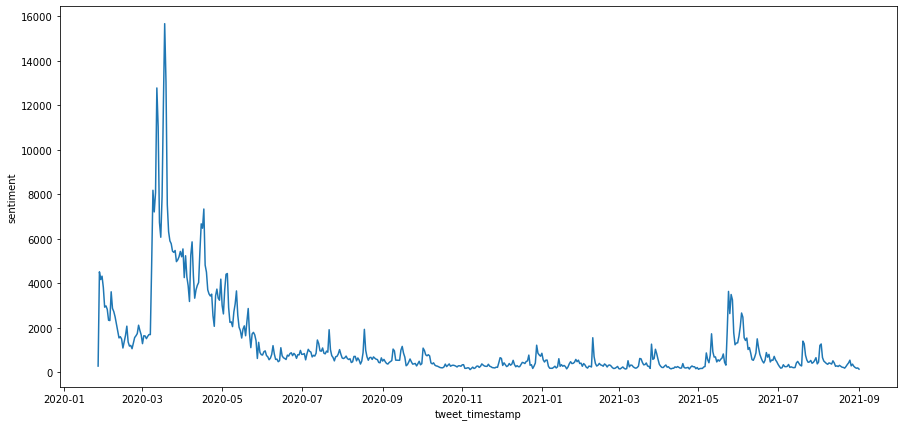

In [30]:
plt.figure(figsize = (15,7))
sns.lineplot(data=US_count, x='tweet_timestamp', y='sentiment')

<AxesSubplot:xlabel='tweet_timestamp', ylabel='sentiment'>

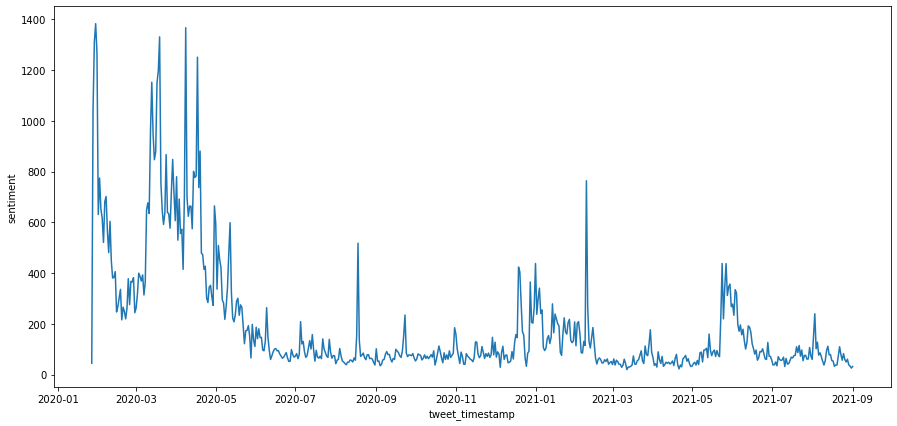

In [31]:
plt.figure(figsize = (15,7))
sns.lineplot(data=UK_count, x='tweet_timestamp', y='sentiment')

## Google Trends Asian Hate Crime

In [336]:
# uk data
google_trends = pd.read_csv('GoogleTrendsAsianHateCrimeUK.csv').reset_index()
google_trends_2 = pd.read_csv('GoogleTrendsStopAsianHateUK.csv').reset_index()
google_trends_3 = pd.read_csv('GoogleTrendsAsianHateUK.csv').reset_index()

# us data
google_trends_4 = pd.read_csv('GoogleTrendsAsianHateCrimeUS.csv').reset_index()
google_trends_5 = pd.read_csv('GoogleTrendsStopAsianHateUS.csv').reset_index()
google_trends_6 = pd.read_csv('GoogleTrendsAsianHateUs.csv').reset_index()

In [337]:
google_trends = google_trends.iloc[1:, :]
google_trends_2 = google_trends_2.iloc[1:, :]
google_trends_3 = google_trends_3.iloc[1:, :]

google_trends_4 = google_trends_4.iloc[1:, :]
google_trends_5 = google_trends_5.iloc[1:, :]
google_trends_6 = google_trends_6.iloc[1:, :]

In [338]:
google_trends.shape, google_trends_2.shape, google_trends_3.shape, google_trends_4.shape, google_trends_5.shape, google_trends_6.shape

((83, 2), (83, 2), (83, 2), (83, 2), (83, 2), (83, 2))

In [339]:
google_trends.columns

Index(['index', 'Category: All categories'], dtype='object')

In [340]:
google_trends.dtypes

index                       object
Category: All categories    object
dtype: object

In [341]:
google_trends['Category: All categories'] = google_trends['Category: All categories'].astype(int)
google_trends_2['Category: All categories'] = google_trends_2['Category: All categories'].astype(int)
google_trends_3['Category: All categories'] = google_trends_3['Category: All categories'].astype(int)
google_trends_4['Category: All categories'] = google_trends_4['Category: All categories'].astype(int)

In [342]:
google_trends_5['Category: All categories'].unique()

array(['0', '<1', '1', '2', '8', '5', '100', '78', '44', '23', '18', '14',
       '12', '13', '10', '7', '4', '3'], dtype=object)

In [343]:
google_trends_6['Category: All categories'].unique()

array(['<1', '0', '1', '2', '5', '7', '8', '14', '12', '100', '67', '57',
       '26', '22', '25', '19', '20', '6', '4', '3'], dtype=object)

In [344]:
def remove_string(row):
    if row['Category: All categories'] == '<1':
        row = 0
    else:
        pass
    return row

In [345]:
google_trends_5 = google_trends_5.apply(remove_string, axis=1)
google_trends_5.dtypes

index                       object
Category: All categories    object
dtype: object

In [346]:
google_trends_5['Category: All categories'] = google_trends_5['Category: All categories'].astype(int)

In [347]:
google_trends_6

,index,Category: All categories
1,2020-02-02,<1
2,2020-02-09,<1
3,2020-02-16,<1
4,2020-02-23,0
5,2020-03-01,1
...,...,...
79,2021-08-01,3
80,2021-08-08,2
81,2021-08-15,2
82,2021-08-22,2


In [348]:
google_trends_6.columns

Index(['index', 'Category: All categories'], dtype='object')

In [349]:
google_trends_6 = google_trends_6.replace('<1', '0')

In [350]:
google_trends_6

,index,Category: All categories
1,2020-02-02,0
2,2020-02-09,0
3,2020-02-16,0
4,2020-02-23,0
5,2020-03-01,1
...,...,...
79,2021-08-01,3
80,2021-08-08,2
81,2021-08-15,2
82,2021-08-22,2


In [351]:
google_trends_6['Category: All categories'] = google_trends_6['Category: All categories'].astype(int)

In [352]:
# uk
asian_hate_uk = google_trends.copy()
asian_hate_uk['total'] = (google_trends['Category: All categories'] + google_trends_2['Category: All categories'] + google_trends_3['Category: All categories'] )/3

# us
asian_hate_us = google_trends_4.copy()
asian_hate_us['total'] = (google_trends_4['Category: All categories'] + google_trends_5['Category: All categories'] + google_trends_6['Category: All categories'] )/3

In [353]:
asian_hate_uk = asian_hate_uk[['index', 'total']]
asian_hate_us = asian_hate_us[['index', 'total']]

In [354]:
asian_hate_us['index'] = pd.to_datetime(asian_hate_us['index'])
asian_hate_uk['index'] = pd.to_datetime(asian_hate_uk['index'])

In [355]:
asian_hate_uk

,index,total
1,2020-02-02,4.666667
2,2020-02-09,4.666667
3,2020-02-16,0.000000
4,2020-02-23,0.666667
5,2020-03-01,0.000000
...,...,...
79,2021-08-01,3.000000
80,2021-08-08,15.333333
81,2021-08-15,1.000000
82,2021-08-22,5.000000


In [356]:
asian_hate_us

,index,total
1,2020-02-02,0.333333
2,2020-02-09,0.000000
3,2020-02-16,0.000000
4,2020-02-23,0.000000
5,2020-03-01,0.666667
...,...,...
79,2021-08-01,1.666667
80,2021-08-08,2.000000
81,2021-08-15,2.000000
82,2021-08-22,1.666667


## Granger Causality

In [357]:
import statsmodels.api as sm
from statsmodels.tsa.stattools import grangercausalitytests

- US_count, asian_hate_us
- UK_count, asian_hate_uk

In [358]:
US_count

,tweet_timestamp,sentiment
0,2020-01-27,276
1,2020-01-28,4514
2,2020-01-29,4167
3,2020-01-30,4320
4,2020-01-31,3806
...,...,...
579,2021-08-28,267
580,2021-08-29,213
581,2021-08-30,179
582,2021-08-31,194


In [359]:
asian_hate_us

,index,total
1,2020-02-02,0.333333
2,2020-02-09,0.000000
3,2020-02-16,0.000000
4,2020-02-23,0.000000
5,2020-03-01,0.666667
...,...,...
79,2021-08-01,1.666667
80,2021-08-08,2.000000
81,2021-08-15,2.000000
82,2021-08-22,1.666667


In [360]:
US_count['tweet_timestamp'].to_list()

[Timestamp('2020-01-27 00:00:00'),
 Timestamp('2020-01-28 00:00:00'),
 Timestamp('2020-01-29 00:00:00'),
 Timestamp('2020-01-30 00:00:00'),
 Timestamp('2020-01-31 00:00:00'),
 Timestamp('2020-02-01 00:00:00'),
 Timestamp('2020-02-02 00:00:00'),
 Timestamp('2020-02-03 00:00:00'),
 Timestamp('2020-02-04 00:00:00'),
 Timestamp('2020-02-05 00:00:00'),
 Timestamp('2020-02-06 00:00:00'),
 Timestamp('2020-02-07 00:00:00'),
 Timestamp('2020-02-08 00:00:00'),
 Timestamp('2020-02-09 00:00:00'),
 Timestamp('2020-02-10 00:00:00'),
 Timestamp('2020-02-11 00:00:00'),
 Timestamp('2020-02-12 00:00:00'),
 Timestamp('2020-02-13 00:00:00'),
 Timestamp('2020-02-14 00:00:00'),
 Timestamp('2020-02-15 00:00:00'),
 Timestamp('2020-02-16 00:00:00'),
 Timestamp('2020-02-17 00:00:00'),
 Timestamp('2020-02-18 00:00:00'),
 Timestamp('2020-02-19 00:00:00'),
 Timestamp('2020-02-20 00:00:00'),
 Timestamp('2020-02-21 00:00:00'),
 Timestamp('2020-02-22 00:00:00'),
 Timestamp('2020-02-23 00:00:00'),
 Timestamp('2020-02-

In [361]:
asian_hate_us['index'].to_list()

[Timestamp('2020-02-02 00:00:00'),
 Timestamp('2020-02-09 00:00:00'),
 Timestamp('2020-02-16 00:00:00'),
 Timestamp('2020-02-23 00:00:00'),
 Timestamp('2020-03-01 00:00:00'),
 Timestamp('2020-03-08 00:00:00'),
 Timestamp('2020-03-15 00:00:00'),
 Timestamp('2020-03-22 00:00:00'),
 Timestamp('2020-03-29 00:00:00'),
 Timestamp('2020-04-05 00:00:00'),
 Timestamp('2020-04-12 00:00:00'),
 Timestamp('2020-04-19 00:00:00'),
 Timestamp('2020-04-26 00:00:00'),
 Timestamp('2020-05-03 00:00:00'),
 Timestamp('2020-05-10 00:00:00'),
 Timestamp('2020-05-17 00:00:00'),
 Timestamp('2020-05-24 00:00:00'),
 Timestamp('2020-05-31 00:00:00'),
 Timestamp('2020-06-07 00:00:00'),
 Timestamp('2020-06-14 00:00:00'),
 Timestamp('2020-06-21 00:00:00'),
 Timestamp('2020-06-28 00:00:00'),
 Timestamp('2020-07-05 00:00:00'),
 Timestamp('2020-07-12 00:00:00'),
 Timestamp('2020-07-19 00:00:00'),
 Timestamp('2020-07-26 00:00:00'),
 Timestamp('2020-08-02 00:00:00'),
 Timestamp('2020-08-09 00:00:00'),
 Timestamp('2020-08-

The google trends data only has 83 data points because it groups data on a weekly basis whereas the tweets is everyday in between the range which is around 584. 

Have to do merge with data points that have same date. it joins on a weekly basis because google trends has data points on a weekly basis.

In [362]:
US_granger = US_count.copy()
UK_granger = UK_count.copy()

In [363]:
US_granger = US_count.merge(asian_hate_us, how='left', left_on=['tweet_timestamp'], right_on=['index'])
UK_granger = UK_count.merge(asian_hate_us, how='left', left_on=['tweet_timestamp'], right_on=['index'])

In [364]:
US_granger = US_granger.dropna()
UK_granger = UK_granger.dropna()

In [365]:
US_granger['tweet_timestamp'].to_list()

[Timestamp('2020-02-02 00:00:00'),
 Timestamp('2020-02-09 00:00:00'),
 Timestamp('2020-02-16 00:00:00'),
 Timestamp('2020-02-23 00:00:00'),
 Timestamp('2020-03-01 00:00:00'),
 Timestamp('2020-03-08 00:00:00'),
 Timestamp('2020-03-15 00:00:00'),
 Timestamp('2020-03-22 00:00:00'),
 Timestamp('2020-03-29 00:00:00'),
 Timestamp('2020-04-05 00:00:00'),
 Timestamp('2020-04-12 00:00:00'),
 Timestamp('2020-04-19 00:00:00'),
 Timestamp('2020-04-26 00:00:00'),
 Timestamp('2020-05-03 00:00:00'),
 Timestamp('2020-05-10 00:00:00'),
 Timestamp('2020-05-17 00:00:00'),
 Timestamp('2020-05-24 00:00:00'),
 Timestamp('2020-05-31 00:00:00'),
 Timestamp('2020-06-07 00:00:00'),
 Timestamp('2020-06-14 00:00:00'),
 Timestamp('2020-06-21 00:00:00'),
 Timestamp('2020-06-28 00:00:00'),
 Timestamp('2020-07-05 00:00:00'),
 Timestamp('2020-07-12 00:00:00'),
 Timestamp('2020-07-19 00:00:00'),
 Timestamp('2020-07-26 00:00:00'),
 Timestamp('2020-08-02 00:00:00'),
 Timestamp('2020-08-09 00:00:00'),
 Timestamp('2020-08-

In [366]:
US_granger

,tweet_timestamp,sentiment,index,total
6,2020-02-02,2984,2020-02-02,0.333333
13,2020-02-09,2493,2020-02-09,0.000000
20,2020-02-16,1371,2020-02-16,0.000000
27,2020-02-23,1298,2020-02-23,0.000000
34,2020-03-01,1285,2020-03-01,0.666667
...,...,...,...,...
552,2021-08-01,459,2021-08-01,1.666667
559,2021-08-08,356,2021-08-08,2.000000
566,2021-08-15,287,2021-08-15,2.000000
573,2021-08-22,256,2021-08-22,1.666667


In [367]:
UK_granger

,tweet_timestamp,sentiment,index,total
6,2020-02-02,775,2020-02-02,0.333333
13,2020-02-09,481,2020-02-09,0.000000
20,2020-02-16,268,2020-02-16,0.000000
27,2020-02-23,262,2020-02-23,0.000000
34,2020-03-01,263,2020-03-01,0.666667
...,...,...,...,...
552,2021-08-01,60,2021-08-01,1.666667
559,2021-08-08,71,2021-08-08,2.000000
566,2021-08-15,79,2021-08-15,2.000000
573,2021-08-22,110,2021-08-22,1.666667


In [368]:
US_granger = US_granger.dropna()
UK_granger = UK_granger.dropna()

In [369]:
# stationary values
US_granger['t1'] = US_granger['sentiment'].diff()
US_granger['t2'] = US_granger['total'].diff()

UK_granger['t1'] = UK_granger['sentiment'].diff()
UK_granger['t2'] = UK_granger['total'].diff()

Tweets are granger causing the asian hate crimes.
- t1 = sentiment
- t2 = total

In [370]:
US_granger

,tweet_timestamp,sentiment,index,total,t1,t2
6,2020-02-02,2984,2020-02-02,0.333333,NaN,NaN
13,2020-02-09,2493,2020-02-09,0.000000,-491.0,-0.333333
20,2020-02-16,1371,2020-02-16,0.000000,-1122.0,0.000000
27,2020-02-23,1298,2020-02-23,0.000000,-73.0,0.000000
34,2020-03-01,1285,2020-03-01,0.666667,-13.0,0.666667
...,...,...,...,...,...,...
552,2021-08-01,459,2021-08-01,1.666667,-4.0,-0.666667
559,2021-08-08,356,2021-08-08,2.000000,-103.0,0.333333
566,2021-08-15,287,2021-08-15,2.000000,-69.0,0.000000
573,2021-08-22,256,2021-08-22,1.666667,-31.0,-0.333333


In [371]:
UK_granger

,tweet_timestamp,sentiment,index,total,t1,t2
6,2020-02-02,775,2020-02-02,0.333333,NaN,NaN
13,2020-02-09,481,2020-02-09,0.000000,-294.0,-0.333333
20,2020-02-16,268,2020-02-16,0.000000,-213.0,0.000000
27,2020-02-23,262,2020-02-23,0.000000,-6.0,0.000000
34,2020-03-01,263,2020-03-01,0.666667,1.0,0.666667
...,...,...,...,...,...,...
552,2021-08-01,60,2021-08-01,1.666667,5.0,-0.666667
559,2021-08-08,71,2021-08-08,2.000000,11.0,0.333333
566,2021-08-15,79,2021-08-15,2.000000,8.0,0.000000
573,2021-08-22,110,2021-08-22,1.666667,31.0,-0.333333


In [372]:
US_granger = US_granger.dropna()
UK_granger = UK_granger.dropna()

US

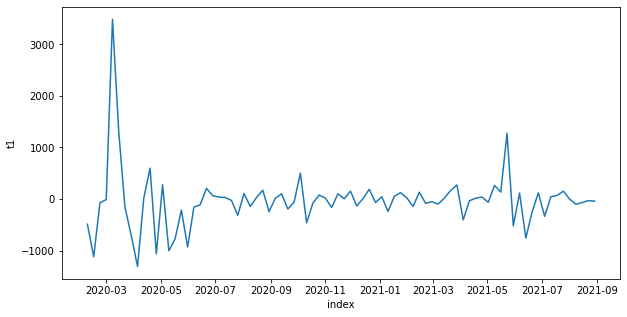

In [373]:
# plot granger graph
plt.figure(figsize = (10,5))
sns.lineplot(x='index', y='t1', data=US_granger) # yellow line = tests
plt.show()

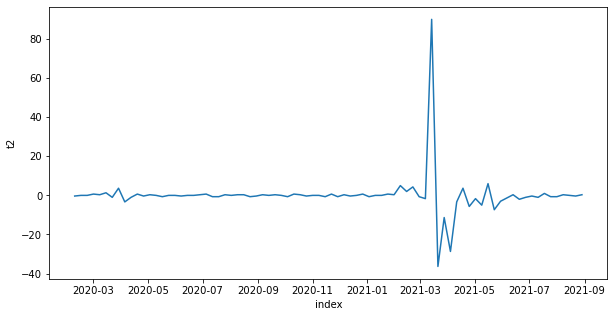

In [374]:
# plot granger graph
plt.figure(figsize = (10,5))
sns.lineplot(x='index', y='t2', data=US_granger)
plt.show()

In [331]:
us_granger_func = US_granger[['t1', 't2']]
uk_granger_func = UK_granger[['t1', 't2']]

In [335]:
gc_us = grangercausalitytests(us_granger_func, 3)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.1262  , p=0.7233  , df_denom=78, df_num=1
ssr based chi2 test:   chi2=0.1311  , p=0.7173  , df=1
likelihood ratio test: chi2=0.1310  , p=0.7174  , df=1
parameter F test:         F=0.1262  , p=0.7233  , df_denom=78, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.2145  , p=0.8075  , df_denom=75, df_num=2
ssr based chi2 test:   chi2=0.4575  , p=0.7955  , df=2
likelihood ratio test: chi2=0.4562  , p=0.7960  , df=2
parameter F test:         F=0.2145  , p=0.8075  , df_denom=75, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.1933  , p=0.9007  , df_denom=72, df_num=3
ssr based chi2 test:   chi2=0.6362  , p=0.8881  , df=3
likelihood ratio test: chi2=0.6336  , p=0.8887  , df=3
parameter F test:         F=0.1933  , p=0.9007  , df_denom=72, df_num=3


In [333]:
gc_uk = grangercausalitytests(uk_granger_func, 3)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0027  , p=0.9589  , df_denom=78, df_num=1
ssr based chi2 test:   chi2=0.0028  , p=0.9580  , df=1
likelihood ratio test: chi2=0.0028  , p=0.9580  , df=1
parameter F test:         F=0.0027  , p=0.9589  , df_denom=78, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.0776  , p=0.9255  , df_denom=75, df_num=2
ssr based chi2 test:   chi2=0.1655  , p=0.9206  , df=2
likelihood ratio test: chi2=0.1653  , p=0.9207  , df=2
parameter F test:         F=0.0776  , p=0.9255  , df_denom=75, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.0693  , p=0.9761  , df_denom=72, df_num=3
ssr based chi2 test:   chi2=0.2281  , p=0.9729  , df=3
likelihood ratio test: chi2=0.2278  , p=0.9730  , df=3
parameter F test:         F=0.0693  , p=0.9761  , df_denom=72, df_num=3
